In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#importamos las librerías que utilizaremos

import pandas as pd
import kagglehub
import mlcroissant as mlc
import seaborn as sns
import matplotlib.pyplot as plt

Webscraping de kaggle

In [10]:
# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/snmahsa/disease-symptoms-and-treatments-dataset/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
df.head()


  -  [Metadata(Disease Symptoms and Treatments Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.
  -  [Metadata(Disease Symptoms and Treatments Dataset)] Property "https://schema.org/version" is recommended, but does not exist.


[RecordSet(uuid="Diseases_Symptoms.csv")]


,Diseases_Symptoms.csv/Name,Diseases_Symptoms.csv/Symptoms,Diseases_Symptoms.csv/Treatments,Diseases_Symptoms.csv/Disease_Code,Diseases_Symptoms.csv/Contagious,Diseases_Symptoms.csv/Chronic
0,b'Gestational Cholestasis',"b'Itchy skin, particularly on the hands and feet'",None,b'D001',False,False
1,b'Injury to Internal Organ',"b'Abdominal pain, bleeding, organ dysfunction'","b'Immediate medical attention, diagnostic test...",b'D002',False,False
2,b'Scabies',"b'Intense itching, especially at night, small ...",b'Prescription medications (topical or oral sc...,b'D003',False,True
3,b'Congenital Glaucoma',"b'Cloudy or hazy eyes, excessive tearing, sens...","b'Surgery (e.g., trabeculotomy, goniotomy) to ...",b'D004',False,True
4,b'Avoidant/Restrictive Food Intake Disorder (A...,b'Avoidance or restriction of certain foods or...,"b'Nutritional counseling, psychotherapy (such ...",b'D005',False,True


ETL

In [11]:
#corregimos los nombres de las columnas
df.columns = [col.split('/')[-1] for col in df.columns]
df.columns = [col.replace('+', '_') for col in df.columns]
df.head()

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,b'Gestational Cholestasis',"b'Itchy skin, particularly on the hands and feet'",None,b'D001',False,False
1,b'Injury to Internal Organ',"b'Abdominal pain, bleeding, organ dysfunction'","b'Immediate medical attention, diagnostic test...",b'D002',False,False
2,b'Scabies',"b'Intense itching, especially at night, small ...",b'Prescription medications (topical or oral sc...,b'D003',False,True
3,b'Congenital Glaucoma',"b'Cloudy or hazy eyes, excessive tearing, sens...","b'Surgery (e.g., trabeculotomy, goniotomy) to ...",b'D004',False,True
4,b'Avoidant/Restrictive Food Intake Disorder (A...,b'Avoidance or restriction of certain foods or...,"b'Nutritional counseling, psychotherapy (such ...",b'D005',False,True


In [12]:
cols = ['Name','Symptoms','Treatments','Disease_Code']

#se debe usar directamente al descargar el df, ya que está en otro codigo
for col in cols:
    df[col]= df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df.head()

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",None,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True


In [13]:
#corroboramos si se encuentran nulos

df.isnull().sum()

,0
Name,0
Symptoms,0
Treatments,1
Disease_Code,0
Contagious,0
Chronic,0


In [14]:
#vemos si la fila afecta
df['Treatments'].isna()

,Treatments
0,True
1,False
2,False
3,False
4,False
...,...
400,False
401,False
402,False
403,False


In [16]:
#lo llenaremos con un Immediate medical attention

df.loc[df['Treatments'].isna(), 'Treatments'] = 'Immediate medical attention'
df.head()

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",Immediate medical attention,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True


In [18]:
#guardamos el datasets

df.to_csv('/content/drive/MyDrive/Disease symptoms/Data/disease_symptoms_and_treatments.csv', index=False, header= True, encoding='utf-8')

EDA

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Disease symptoms/Data/disease_symptoms_and_treatments.csv')
df.head()

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
0,Gestational Cholestasis,"Itchy skin, particularly on the hands and feet",Immediate medical attention,D001,False,False
1,Injury to Internal Organ,"Abdominal pain, bleeding, organ dysfunction","Immediate medical attention, diagnostic tests,...",D002,False,False
2,Scabies,"Intense itching, especially at night, small bl...",Prescription medications (topical or oral scab...,D003,False,True
3,Congenital Glaucoma,"Cloudy or hazy eyes, excessive tearing, sensit...","Surgery (e.g., trabeculotomy, goniotomy) to cr...",D004,False,True
4,Avoidant/Restrictive Food Intake Disorder (ARFID),Avoidance or restriction of certain foods or e...,"Nutritional counseling, psychotherapy (such as...",D005,False,True


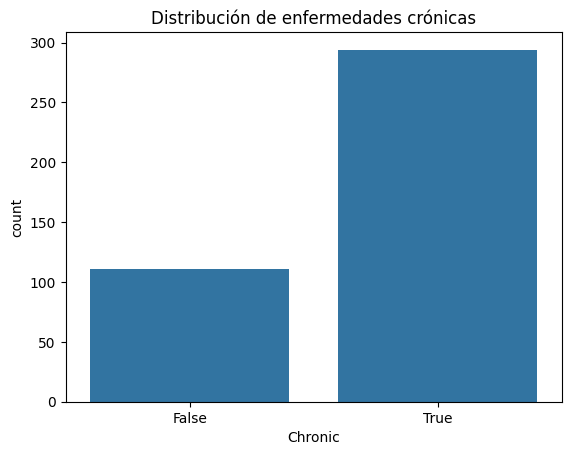

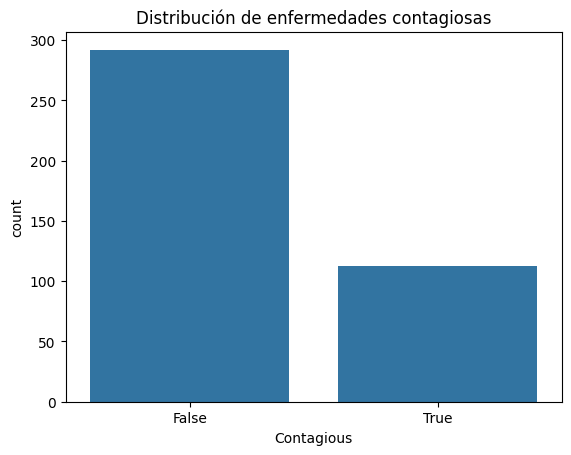

In [21]:
# vizualizamos el numero de enfermedades crónicas y contagiosas

sns.countplot(x='Chronic', data=df)
plt.title('Distribución de enfermedades crónicas')
plt.show()

sns.countplot(x='Contagious', data=df)
plt.title('Distribución de enfermedades contagiosas')
plt.show()

In [9]:
#buscamos enfermedades más comunes por tipo (si hay duplicados)

df['Name'].value_counts().head(10)

,count
Name,
Sciatica,3
Endometriosis,2
Complex Regional Pain Syndrome (CRPS),2
Migraine,2
Mucocele,2
Fibromyalgia,2
Urinary Tract Infection (UTI),2
Type 2 Diabetes,2
Dermatitis due to Sun Exposure,2


In [10]:
#verificamos si las enfermedades que se repiten tienen algún sintoma diferente
df[df['Name'] == 'Sciatica']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
186,Sciatica,"Sharp pain, tingling, or numbness that radiate...","Rest, gentle stretching exercises, warm or col...",D187,False,False
232,Sciatica,Pain radiating from the lower back to the leg,"Pain medications, physical therapy, stretching...",D187,False,True
251,Sciatica,"Lower back pain, leg pain, numbness or tingling","Pain relievers, physical therapy, exercise",D187,False,True


In [11]:
df[df['Name'] == 'Endometriosis']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
161,Endometriosis,"Pelvic pain, painful periods, infertility","Pain medications, hormonal therapies, surgery",D162,False,True
305,Endometriosis,"Pelvic pain (during menstruation, intercourse,...",Pain management (such as nonsteroidal anti-inf...,D162,False,True


In [12]:
df[df['Name'] == 'Complex Regional Pain Syndrome (CRPS)']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
99,Complex Regional Pain Syndrome (CRPS),"Intense burning pain, swelling, changes in ski...","Physical therapy, medications, nerve blocks",D100,False,True
349,Complex Regional Pain Syndrome (CRPS),"Severe and persistent pain, changes in skin co...","Medications (such as pain relievers, corticost...",D100,False,True


In [13]:
df[df['Name'] == 'Migraine']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
203,Migraine,"Severe headaches, nausea, sensitivity to light...","Pain-relieving medications, lifestyle changes,...",D203,False,True
370,Migraine,"headache, nausea, sensitivity to light, visual...","pain relief medication, rest, cold compress",D203,False,True


In [14]:
df[df['Name'] == 'Mucocele']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
84,Mucocele,Painless fluid-filled swelling in the oral cavity,"Observation, Surgical removal if necessary",D085,False,False
300,Mucocele,"Painless swelling, usually on the lower lip or...","Observation, surgical removal if necessary",D085,False,False


In [15]:
df[df['Name'] == 'Fibromyalgia']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
343,Fibromyalgia,"Widespread musculoskeletal pain, fatigue, slee...",Multidisciplinary approach: Medications for pa...,D337,True,True
367,Fibromyalgia,"Widespread musculoskeletal pain, fatigue, slee...","Medications (such as pain relievers, antidepre...",D337,True,True


In [16]:
df[df['Name'] == 'Urinary Tract Infection (UTI)']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
258,Urinary Tract Infection (UTI),"Frequent urination, burning sensation during u...","Antibiotics, increased fluid intake, pain reli...",D256,False,False
294,Urinary Tract Infection (UTI),"Painful urination, frequent urination, pelvic ...","Antibiotics safe for pregnancy, increased flui...",D256,False,False


In [17]:
df[df['Name'] =='Type 2 Diabetes']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
66,Type 2 Diabetes,"increased thirst, frequent urination, fatigue","insulin, medication, lifestyle change",D067,True,True
187,Type 2 Diabetes,"Fatigue, Increased hunger, Slow healing of wounds","Oral medications, Insulin therapy (in some cas...",D067,True,True


In [18]:
df[df['Name'] == 'Dermatitis due to Sun Exposure']

,Name,Symptoms,Treatments,Disease_Code,Contagious,Chronic
221,Dermatitis due to Sun Exposure,"Sunburn-like rash, redness, itching","Moisturizers, cool compresses, topical cortico...",D221,False,False
319,Dermatitis due to Sun Exposure,"Redness, itching, rash, blistering","Topical corticosteroids, moisturizers, avoidin...",D221,False,False


In [20]:
#como vimos todas las enfermedades que aparecen al menos dos veces tienen el mismo codigo así que uniremos las descripciones en una sola enfermedad
df_group = df.groupby('Disease_Code').agg({
    'Name': 'first',
    'Symptoms': lambda x: ', '.join(sorted(set(','.join(x).split(',')))),
    'Treatments': lambda x: ', '.join(sorted(set(','.join(x).split(',')))),
    'Chronic': 'any', #si alguna es true sera true
    'Contagious': 'any' #si alguna est true sera true
    }).reset_index()

df_group['Name'].value_counts().head(10)

,count
Name,
Spondylitis,1
Gestational Cholestasis,1
Injury to Internal Organ,1
Scabies,1
Congenital Glaucoma,1
Avoidant/Restrictive Food Intake Disorder (ARFID),1
Subdural hemorrhage,1
Poisoning due to Antidepressants,1
Mittelschmerz,1


In [21]:
#guardamos el df limpio
df_group.to_csv('/content/drive/MyDrive/Disease symptoms/Data/disease_symptoms_and_treatments_clean.csv', index=False, header= True, encoding='utf-8')

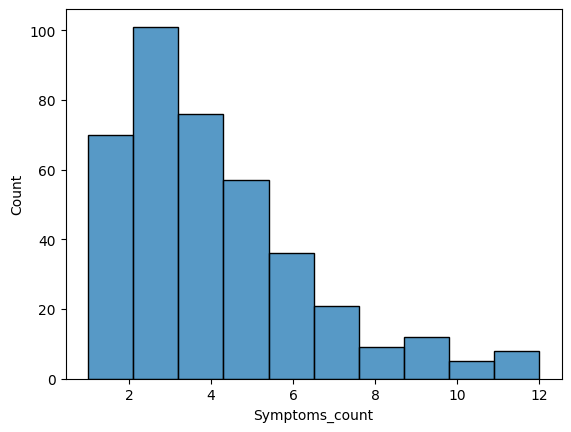

In [22]:
#ahora vemos la cantidad promedio de sintomas por enfermedad

df_group['Symptoms_count'] = df_group['Symptoms'].apply(lambda x: len(x.split(',')))
sns.histplot(df_group['Symptoms_count'], bins=10)
plt.show()

ML

In [25]:
#importamos las librerías necesarias

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

#limpiamos el texto

df_group['Symptoms_clean'] = df_group['Symptoms'].str.lower().str.replace('[^a-z,]', '', regex=True)

#vectorizamos texto
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_group['Symptoms_clean'])

#codificamos las etiquetas
le = LabelEncoder()
y = le.fit_transform(df_group['Name']) # o desesse_code

#dividimos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos el modelo
model = MultinomialNB()
model.fit(X_train, y_train)

#Realizamos predicciones
y_pred = model.predict(X_test)

#Evaluamos el modelo
# Get the unique labels in the test set
test_labels = np.unique(y_test)
# Get the corresponding target names
target_names_subset = le.inverse_transform(test_labels)

print(classification_report(y_test, y_pred, labels=test_labels, target_names=target_names_subset))

                                                          precision    recall  f1-score   support

                                      Acute Otitis Media       0.00      0.00      0.00       1.0
                                                 Anxiety       0.00      0.00      0.00       1.0
                                             Atelectasis       0.00      0.00      0.00       1.0
                                      Atrophic vaginitis       0.00      0.00      0.00       1.0
         Attention Deficit Hyperactivity Disorder (ADHD)       0.00      0.00      0.00       1.0
                                                  Autism       0.00      0.00      0.00       1.0
                                               Balanitis       0.00      0.00      0.00       1.0
                                      Benign Kidney Cyst       0.00      0.00      0.00       1.0
                             Benzodiazepine Use Disorder       0.00      0.00      0.00       1.0
                   

In [26]:
#funcion para pasar sintomas y conocer si funciona el modelo

def predecir_enfermead(texto):
  texto = texto.lower()
  texto_vectorizado = vectorizer.transform([texto])
  prediccion = model.predict(texto_vectorizado)
  return le.inverse_transform(prediccion)[0]

print(predecir_enfermead('itching at night, small red bumps'))

Psoriasis


In [29]:
# usaremos NLP y ML

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sprase import hstack

df = df_group.copy()

#limpieza
df['Syptoms_clean'] = df['Symptoms'].str.lower().str.replace('[^a-z,]', '', regex=True)

#TF-IDF para sintomas
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df['Syptoms_clean'])

#agregamos variables adicionales (chronic y contagious)
X_extra = df[['Chronic', 'Contagious']].astype(int)
X = hstack([X_text, X_extra])

#codificamos las etiquetas
le = LabelEncoder()
y = le.fit_transform(df['Name'])

In [32]:
#con xboos
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))

                                                          precision    recall  f1-score   support

                                      Acute Otitis Media       0.00      0.00      0.00       1.0
                                                 Anxiety       0.00      0.00      0.00       1.0
                                             Atelectasis       0.00      0.00      0.00       1.0
                                      Atrophic vaginitis       0.00      0.00      0.00       1.0
         Attention Deficit Hyperactivity Disorder (ADHD)       0.00      0.00      0.00       1.0
                                                  Autism       0.00      0.00      0.00       1.0
                                               Balanitis       0.00      0.00      0.00       1.0
                                      Benign Kidney Cyst       0.00      0.00      0.00       1.0
                             Benzodiazepine Use Disorder       0.00      0.00      0.00       1.0
                   

In [38]:
#guaradmos
import joblib

joblib.dump(model, '/content/drive/MyDrive/Disease symptoms/model.pkl')
joblib.dump(vectorizer, '/content/drive/MyDrive/Disease symptoms/vectorizer.pkl')
joblib.dump(le, '/content/drive/MyDrive/Disease symptoms/le.pkl')

['/content/drive/MyDrive/Disease symptoms/le.pkl']